<a href="https://colab.research.google.com/github/pa7003/Market_Basket_Analysis/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Dataset Download in Colab

In [ ]:
# Step 1: Install Kaggle API
!pip install kaggle

# Step 2: Upload kaggle.json file (from your Kaggle account)
from google.colab import files
files.upload()  # Upload your kaggle.json here

# Step 3: Set up Kaggle config
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the dataset
!kaggle datasets download -d mashlyn/online-retail-ii-uci

# Step 5: Unzip the downloaded dataset
!unzip online-retail-ii-uci.zip


Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci
License(s): CC0-1.0
online-retail-ii-uci.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  online-retail-ii-uci.zip
replace online_retail_II.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import os

# List all files in the current directory
os.listdir()


['.config',
 'kaggle.json',
 'online_retail_II.csv',
 'kaggle (1).json',
 'online-retail-ii-uci.zip',
 'sample_data']

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("online_retail_II.csv", encoding='ISO-8859-1')
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


#  Data Cleaning

In [ ]:
# Load the CSV
import pandas as pd

df = pd.read_csv("online_retail_II.csv", encoding='ISO-8859-1')
print("Original shape:", df.shape)

# Drop rows with missing CustomerID or Description
df.dropna(subset=['Customer ID', 'Description'], inplace=True)
print("After dropping nulls:", df.shape)

# Remove rows with negative or zero quantity (likely returns)
df = df[df['Quantity'] > 0]

# Remove rows with invalid unit prices (<= 0)
df = df[df['Price'] > 0]

# Strip whitespace and make description consistent
df['Description'] = df['Description'].str.strip().str.lower()

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new column for InvoiceMonth for seasonal analysis
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# View cleaned info
df.info()
df.head()


Original shape: (1067371, 8)
After dropping nulls: (824364, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       805549 non-null  object        
 1   StockCode     805549 non-null  object        
 2   Description   805549 non-null  object        
 3   Quantity      805549 non-null  int64         
 4   InvoiceDate   805549 non-null  datetime64[ns]
 5   Price         805549 non-null  float64       
 6   Customer ID   805549 non-null  float64       
 7   Country       805549 non-null  object        
 8   InvoiceMonth  805549 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(4), period[M](1)
memory usage: 61.5+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12


# Exploratory Data Analysis

##  1. Top 10 Selling Products

<ipython-input-8-2634983480>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


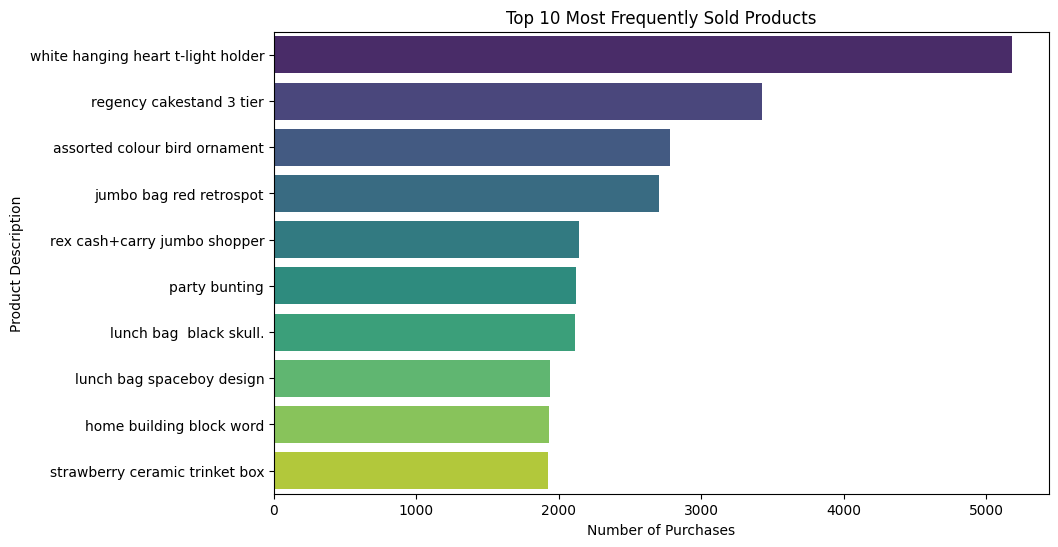

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_products = df['Description'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Most Frequently Sold Products')
plt.xlabel('Number of Purchases')
plt.ylabel('Product Description')
plt.show()


##  2. Top 10 Customers by Purchase Volume

<ipython-input-9-4086866017>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette='magma')


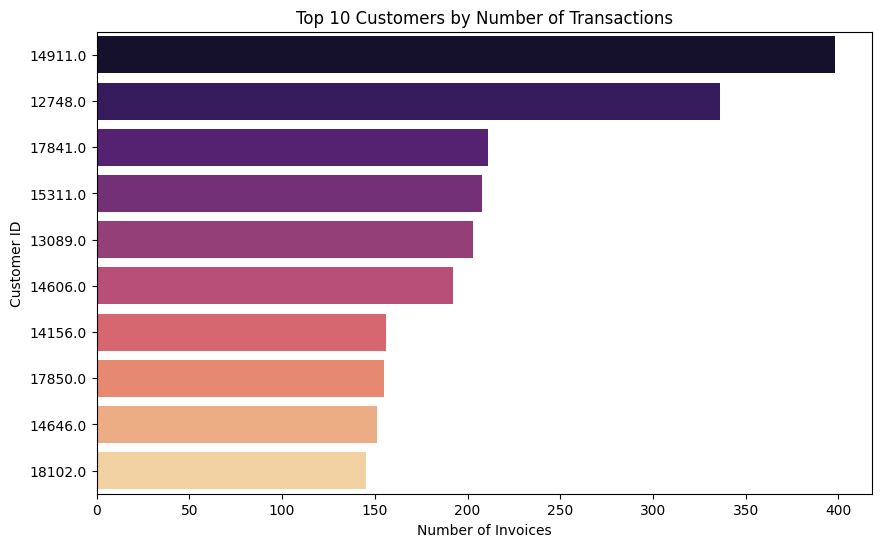

In [ ]:
top_customers = df.groupby('Customer ID')['Invoice'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette='magma')
plt.title('Top 10 Customers by Number of Transactions')
plt.xlabel('Number of Invoices')
plt.ylabel('Customer ID')
plt.show()


## 3. Monthly Sales Trend

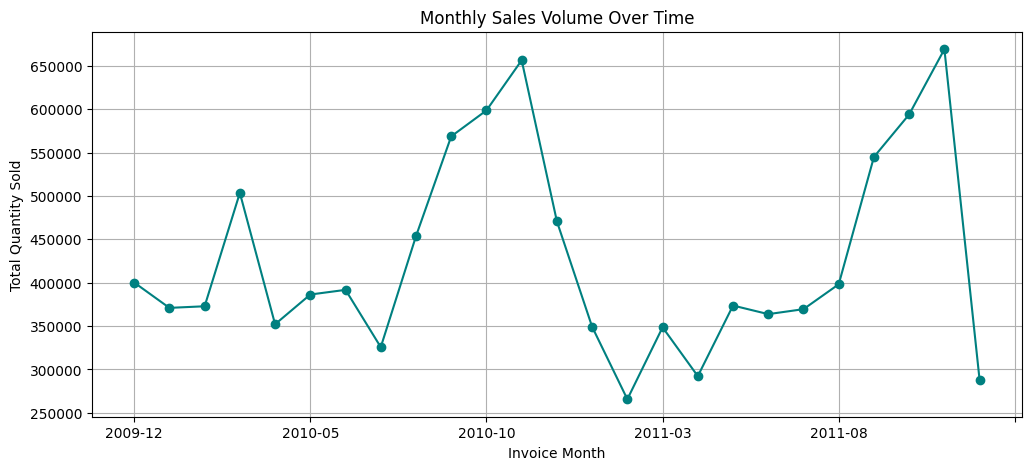

In [ ]:
# Assuming df now has the 'InvoiceMonth' column as per the info() output
monthly_sales = df.groupby('InvoiceMonth')['Quantity'].sum()

plt.figure(figsize=(12, 5))
# Convert the index (which is period[M]) to string for plotting compatibility
monthly_sales.index = monthly_sales.index.astype(str)
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Sales Volume Over Time')
plt.xlabel('Invoice Month')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

## 4. Sales by Hour of Day

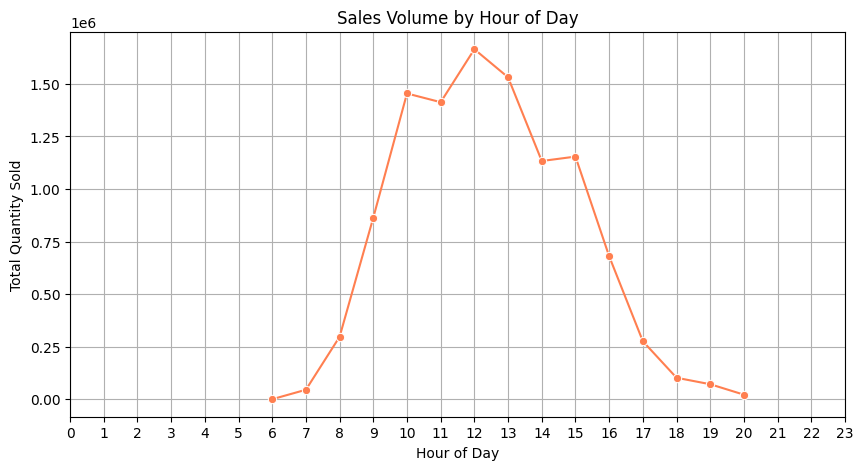

In [ ]:
# Convert InvoiceDate to datetime format if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Hour'] = df['InvoiceDate'].dt.hour
hourly_sales = df.groupby('Hour')['Quantity'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o', color='coral')
plt.title('Sales Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Quantity Sold')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## 5. Country Wise Insights

In [ ]:
import plotly.express as px

# 1. Clean data: remove cancelled orders (InvoiceNo starting with 'C') and null values
df_clean = df[~df['Invoice'].astype(str).str.startswith('C')]
df_clean = df_clean.dropna(subset=['Country', 'Quantity', 'Price'])

# 2. Calculate Total Price
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['Price']

# 3. Group by country and sum revenue
country_sales = df_clean.groupby('Country')['TotalPrice'].sum().reset_index()

# 4. Sort and filter top 10 countries
top_countries = country_sales.sort_values(by='TotalPrice', ascending=False).head(10)

# 5. Plot with Plotly
fig = px.bar(top_countries,
             x='Country',
             y='TotalPrice',
             title='Top 10 Countries by Total Sales',
             text='TotalPrice',
             labels={'TotalPrice': 'Total Revenue'},
             color='TotalPrice',
             color_continuous_scale='Blues')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


# Temporal Analysis

## 1. Monthly Sales Trend

In [ ]:
import pandas as pd
import plotly.express as px

# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Monthly aggregation
df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['Quantity'].sum().reset_index()

# Plot
fig = px.line(monthly_sales, x='Month', y='Quantity',
              title='Monthly Sales Trend', markers=True)
fig.update_layout(xaxis_title='Month', yaxis_title='Total Quantity Sold')
fig.show()


## 2. Weekly Sales Trend

In [ ]:
df['Week'] = df['InvoiceDate'].dt.to_period('W').astype(str)
weekly_sales = df.groupby('Week')['Quantity'].sum().reset_index()

fig = px.line(weekly_sales, x='Week', y='Quantity',
              title='Weekly Sales Trend', markers=True)
fig.update_layout(xaxis_title='Week', yaxis_title='Total Quantity Sold')
fig.show()


## 3. Hourly Purchase Patterns

In [ ]:
df['Hour'] = df['InvoiceDate'].dt.hour
hourly_sales = df.groupby('Hour')['Quantity'].sum().reset_index()

fig = px.bar(hourly_sales, x='Hour', y='Quantity',
             title='Sales Distribution by Hour of Day')
fig.update_layout(xaxis_title='Hour (0-23)', yaxis_title='Total Quantity Sold')
fig.show()


## 4: Day of Week Patterns

In [ ]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
dow_sales = df.groupby('DayOfWeek')['Quantity'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

fig = px.bar(dow_sales, x='DayOfWeek', y='Quantity',
             title='Sales Distribution by Day of Week')
fig.update_layout(xaxis_title='Day of Week', yaxis_title='Total Quantity Sold')
fig.show()


# Sequential Pattern Mining

In [ ]:
# Install and Import PrefixSpan
!pip install prefixspan
from prefixspan import PrefixSpan

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11215 sha256=de3227da874bd587441e97c7762de1a1ab7808b0548f5930534c9e3442e88452
  Stored in directory: /root/.cache/pip/wheels/95/1a/4a/d02ca86ccf55a25e07bd200a5320b8a584e5e2b75b1168f703
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=3ee62c62e584f3ef3c0c171d30f04582703c3f69db2f37484141171fc5417d9d
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28865 sha256=c3a331ceffe09ce927b736dd91b62a05ebfc266b9d2c9565b336f9584006ae4f
  Stored in directory: /root/.cache/pip/wheels/a8/79/68/6f2edcddbadb15fdcff02e0748a05579d52e78185a4546ab4b
Successfully built prefixspan docopt extratools


In [ ]:
# Prepare Data as Sequences
# Sort by Invoice and Date
df_sorted = df.sort_values(by=['Customer ID', 'Invoice', 'InvoiceDate'])

# Group each invoice as a list of purchased items
sequences = df_sorted.groupby(['Invoice'])['Description'].apply(list).tolist()


In [ ]:
# Run PrefixSpan to Find Frequent Sequences
# Minimum support (frequency threshold)
ps = PrefixSpan(sequences)
frequent_seqs = ps.frequent(50)  # Show top 50 sequences

# Display top patterns
for support, pattern in sorted(frequent_seqs, key=lambda x: -x[0])[:10]:
    print(f"Support: {support}, Sequence: {pattern}")


Support: 4888, Sequence: ['white hanging heart t-light holder']
Support: 3317, Sequence: ['regency cakestand 3 tier']
Support: 2652, Sequence: ['assorted colour bird ornament']
Support: 2612, Sequence: ['jumbo bag red retrospot']
Support: 2077, Sequence: ['party bunting']
Support: 1997, Sequence: ['lunch bag  black skull.']
Support: 1874, Sequence: ['lunch bag spaceboy design']
Support: 1857, Sequence: ['rex cash+carry jumbo shopper']
Support: 1831, Sequence: ['home building block word']
Support: 1818, Sequence: ['strawberry ceramic trinket box']


In [ ]:
# Convert to DataFrame
import pandas as pd

patterns_df = pd.DataFrame(frequent_seqs, columns=['Support', 'Sequence'])
patterns_df = patterns_df.sort_values(by='Support', ascending=False)
patterns_df.head(10)

,Support,Sequence
846,4888,[white hanging heart t-light holder]
8709,3317,[regency cakestand 3 tier]
211,2652,[assorted colour bird ornament]
10064,2612,[jumbo bag red retrospot]
5321,2077,[party bunting]
4680,1997,[lunch bag black skull.]
8196,1874,[lunch bag spaceboy design]
4392,1857,[rex cash+carry jumbo shopper]
144,1831,[home building block word]
8,1818,[strawberry ceramic trinket box]


## Seasonal Trend Analysis

In [ ]:
# Ensure InvoiceDate is datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Extract year and quarter
df_clean['Quarter'] = df_clean['InvoiceDate'].dt.to_period('Q')

# Group by quarter
quarterly_sales = df_clean.groupby('Quarter')['TotalPrice'].sum().reset_index()

# Convert the 'Quarter' column to string before plotting
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].astype(str)

# Plot
fig = px.line(quarterly_sales,
              x='Quarter',
              y='TotalPrice',
              title='Quarterly Sales Trend',
              labels={'TotalPrice': 'Total Sales'},
              markers=True)

fig.update_layout(xaxis_title='Quarter',
                  yaxis_title='Revenue',
                  title_x=0.5)
fig.show()

# Create the Transaction Basket Format

## Objective:
###Transform the data into a basket format, where each row = a transaction and each column = a product, with 1 indicating the product was bought in that transaction.

## Filter Valid Transactions
## Removing:

### i) Canceled transactions (those with invoices starting with 'C')

### ii) Missing customer IDs

### iii) Negative quantities


In [ ]:
# Remove canceled orders
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Drop NA customers
df = df.dropna(subset=['Customer ID'])

# Keep only positive quantities
df = df[df['Quantity'] > 0]

df.shape


(805549, 13)

## Creating the Basket
### Now group by *Invoice* and *Description* to create a **basket of items** per transaction.


In [ ]:
# 1. Filter only UK transactions (most data comes from UK)
df_uk = df[df['Country'] == 'United Kingdom']

# 2. Remove rare products (appeared < 30 times)
product_counts = df_uk['Description'].value_counts()
popular_products = product_counts[product_counts >= 30].index
df_uk = df_uk[df_uk['Description'].isin(popular_products)]

# 3. Create basket matrix (Invoice x Product with 1/0)
basket = (df_uk
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum()
          .unstack()
          .fillna(0)
          .applymap(lambda x: 1 if x > 0 else 0))

# 4. Generate frequent itemsets using Apriori (with lower memory footprint)
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head()


<ipython-input-23-2796060369>:15: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
158,0.141019,(white hanging heart t-light holder)
129,0.085673,(regency cakestand 3 tier)
9,0.075114,(assorted colour bird ornament)
66,0.071724,(jumbo bag red retrospot)
108,0.058225,(party bunting)


# Frequent Itemset Mining (Apriori)

## Objective:
### Find product combinations that appear frequently together in transactions using the **Apriori algorithm** from mlxtend

In [ ]:
! pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

basket_small = basket.head(5000)
# Run Apriori on reduced data
frequent_itemsets = apriori(basket_small, min_support=0.02, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets.head()

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
228,0.1950,(white hanging heart t-light holder)
86,0.0842,(jumbo bag red white spotty)
201,0.0814,(strawberry ceramic trinket box)
128,0.0798,(pack of 72 retro spot cake cases)
75,0.0714,(home building block word)


# Implement FP-Growth Algorithm (because it is faster than Apriori)

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets_fp = fpgrowth(basket, min_support=0.02, use_colnames=True)
frequent_itemsets_fp.sort_values(by='support', ascending=False).head()


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
12,0.141019,(white hanging heart t-light holder)
117,0.085673,(regency cakestand 3 tier)
1,0.075114,(assorted colour bird ornament)
130,0.071724,(jumbo bag red retrospot)
73,0.058225,(party bunting)


In [ ]:
# Generate Association Rule from FP-Growth Itemsets
from mlxtend.frequent_patterns import association_rules

rules_fp = association_rules(frequent_itemsets_fp, metric='lift', min_threshold=1.0)
rules_fp = rules_fp.sort_values(by='lift', ascending=False)
rules_fp.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
7,(strawberry ceramic trinket box),(sweetheart ceramic trinket box),0.049706,0.032907,0.022678,0.456246,13.864562,1.0,0.021042,1.778549,0.976407,0.378378,0.437744,0.572699
6,(sweetheart ceramic trinket box),(strawberry ceramic trinket box),0.032907,0.049706,0.022678,0.689152,13.864562,1.0,0.021042,3.057104,0.959447,0.378378,0.672893,0.572699
11,(wooden picture frame white finish),(wooden frame antique white),0.048326,0.051566,0.029158,0.603352,11.700605,1.0,0.026666,2.391123,0.960975,0.412214,0.581786,0.584398
10,(wooden frame antique white),(wooden picture frame white finish),0.051566,0.048326,0.029158,0.565445,11.700605,1.0,0.026666,2.189996,0.964257,0.412214,0.543378,0.584398
1,(love building block word),(home building block word),0.043377,0.053036,0.022918,0.528354,9.962224,1.0,0.020618,2.007786,0.940413,0.311837,0.501939,0.480240


In [ ]:
# Prettify the FP-Growth Rules
def prettify_rules(rules_df):
    rules_df['antecedents'] = rules_df['antecedents'].apply(lambda x: ', '.join(list(x)))
    rules_df['consequents'] = rules_df['consequents'].apply(lambda x: ', '.join(list(x)))
    return rules_df[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

rules_fp_pretty = prettify_rules(rules_fp)
rules_fp_pretty.head(10)

,antecedents,consequents,support,confidence,lift
7,strawberry ceramic trinket box,sweetheart ceramic trinket box,0.022678,0.456246,13.864562
6,sweetheart ceramic trinket box,strawberry ceramic trinket box,0.022678,0.689152,13.864562
11,wooden picture frame white finish,wooden frame antique white,0.029158,0.603352,11.700605
10,wooden frame antique white,wooden picture frame white finish,0.029158,0.565445,11.700605
1,love building block word,home building block word,0.022918,0.528354,9.962224
0,home building block word,love building block word,0.022918,0.432127,9.962224
17,heart of wicker large,heart of wicker small,0.025648,0.496804,9.573101
16,heart of wicker small,heart of wicker large,0.025648,0.494220,9.573101
14,lunch bag black skull.,lunch bag spaceboy design,0.021928,0.384332,7.630793
15,lunch bag spaceboy design,lunch bag black skull.,0.021928,0.435378,7.630793


## Visualize Frequent Itemsets

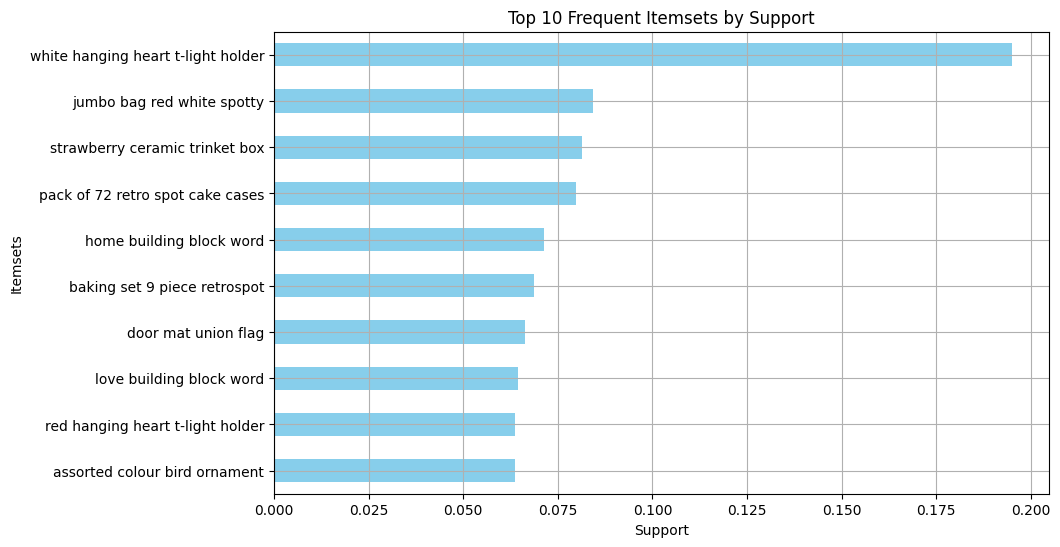

In [ ]:
# Create a new column with readable itemsets
frequent_itemsets['itemsets_str'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(sorted(list(x))))

# Plot top 10 frequent itemsets with readable labels
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
top_itemsets.set_index('itemsets_str')['support'].plot(kind='barh', figsize=(10, 6), color='skyblue')

plt.title('Top 10 Frequent Itemsets by Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()


### Converting  Antecedents & Consequents to Readable Strings

In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Prettify antecedents and consequents
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(sorted(list(x))))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(sorted(list(x))))

# Display top rules
rules[['antecedents_str', 'consequents_str', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10)



,antecedents_str,consequents_str,support,confidence,lift
63,set/10 blue spotty party candles,set/10 pink spotty party candles,0.0204,0.879310,29.507059
62,set/10 pink spotty party candles,set/10 blue spotty party candles,0.0204,0.684564,29.507059
38,blue felt easter egg basket,pink felt easter egg basket,0.0226,0.807143,26.550752
39,pink felt easter egg basket,blue felt easter egg basket,0.0226,0.743421,26.550752
48,bathroom metal sign,toilet metal sign,0.0214,0.529703,21.019959
49,toilet metal sign,bathroom metal sign,0.0214,0.849206,21.019959
56,cream felt easter egg basket,pink felt easter egg basket,0.0204,0.614458,20.212429
57,pink felt easter egg basket,cream felt easter egg basket,0.0204,0.671053,20.212429
64,black/blue dots ruffled umbrella,red/white dots ruffled umbrella,0.0200,0.684932,19.025875
65,red/white dots ruffled umbrella,black/blue dots ruffled umbrella,0.0200,0.555556,19.025875


### Generate Association Rules (Confidence, Lift)

In [ ]:
from mlxtend.frequent_patterns import association_rules

# Generate rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Filter by confidence ≥ 0.5
strong_rules = rules[rules['confidence'] >= 0.5]

# View top rules
strong_rules.sort_values(by='lift', ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
62,(set/10 pink spotty party candles),(set/10 blue spotty party candles),0.0298,0.0232,0.0204,0.684564,29.507059,1.0,0.019709,3.096664,0.995784,0.625767,0.677072,0.781937
63,(set/10 blue spotty party candles),(set/10 pink spotty party candles),0.0232,0.0298,0.0204,0.879310,29.507059,1.0,0.019709,8.038800,0.989056,0.625767,0.875603,0.781937
38,(blue felt easter egg basket),(pink felt easter egg basket),0.0280,0.0304,0.0226,0.807143,26.550752,1.0,0.021749,5.027556,0.990058,0.631285,0.801096,0.775282
39,(pink felt easter egg basket),(blue felt easter egg basket),0.0304,0.0280,0.0226,0.743421,26.550752,1.0,0.021749,3.788308,0.992509,0.631285,0.736030,0.775282
49,(toilet metal sign),(bathroom metal sign),0.0252,0.0404,0.0214,0.849206,21.019959,1.0,0.020382,6.363663,0.977048,0.484163,0.842858,0.689455
48,(bathroom metal sign),(toilet metal sign),0.0404,0.0252,0.0214,0.529703,21.019959,1.0,0.020382,2.072733,0.992524,0.484163,0.517545,0.689455
57,(pink felt easter egg basket),(cream felt easter egg basket),0.0304,0.0332,0.0204,0.671053,20.212429,1.0,0.019391,2.939072,0.980327,0.472222,0.659757,0.642755
56,(cream felt easter egg basket),(pink felt easter egg basket),0.0332,0.0304,0.0204,0.614458,20.212429,1.0,0.019391,2.514900,0.983167,0.472222,0.602370,0.642755
64,(black/blue dots ruffled umbrella),(red/white dots ruffled umbrella),0.0292,0.0360,0.0200,0.684932,19.025875,1.0,0.018949,3.059652,0.975937,0.442478,0.673165,0.620244
65,(red/white dots ruffled umbrella),(black/blue dots ruffled umbrella),0.0360,0.0292,0.0200,0.555556,19.025875,1.0,0.018949,2.184300,0.982822,0.442478,0.542187,0.620244


## Association rules as a network graph

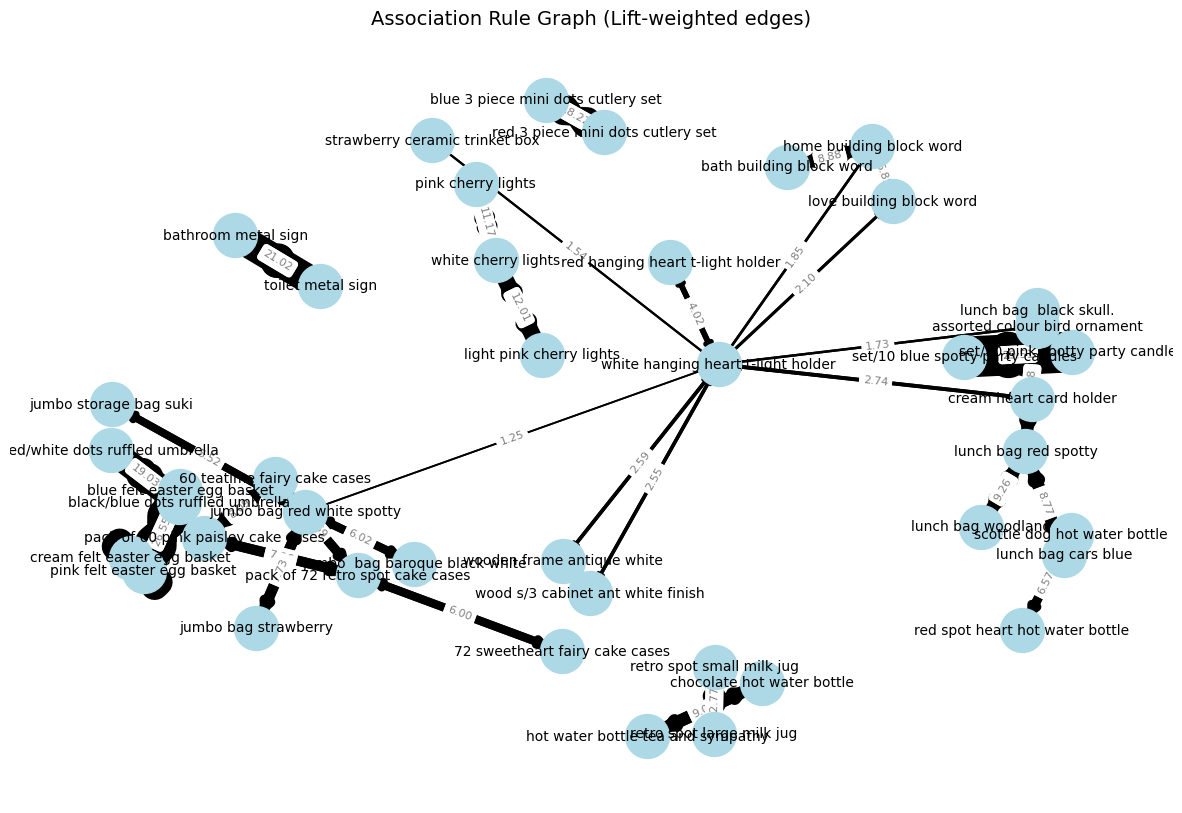

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules

# Regenerate rules with antecedents_str and consequents_str columns
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(sorted(list(x))))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(sorted(list(x))))


# Create a directed graph
G = nx.DiGraph()

# Add edges with lift as weight
for _, row in rules.iterrows():
    G.add_edge(row['antecedents_str'], row['consequents_str'], weight=row['lift'])

# Draw the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=1)  # Positioning the nodes

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')

# Edges
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] for (_, _, d) in edges])

# Labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Edge labels (optional, can show lift)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='gray', font_size=8)

plt.title("Association Rule Graph (Lift-weighted edges)", fontsize=14)
plt.axis('off')
plt.show()

## Plotly-Based Association Rules Graph

In [ ]:
import plotly.graph_objects as go

# Limit to top 20 strongest rules by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(20)

# Create lists of unique item names for plotting
labels = list(set(top_rules['antecedents_str']) | set(top_rules['consequents_str']))
label_indices = {label: idx for idx, label in enumerate(labels)}

# Source and target for links
sources = top_rules['antecedents_str'].map(label_indices)
targets = top_rules['consequents_str'].map(label_indices)

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="skyblue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=top_rules['lift'],
        hovertemplate='Lift: %{value:.2f}<extra></extra>'
    )
)])

fig.update_layout(title_text="Association Rules Sankey Diagram (Top 20 by Lift)", font_size=12)
fig.show()


## Heatmaps of Itemsets

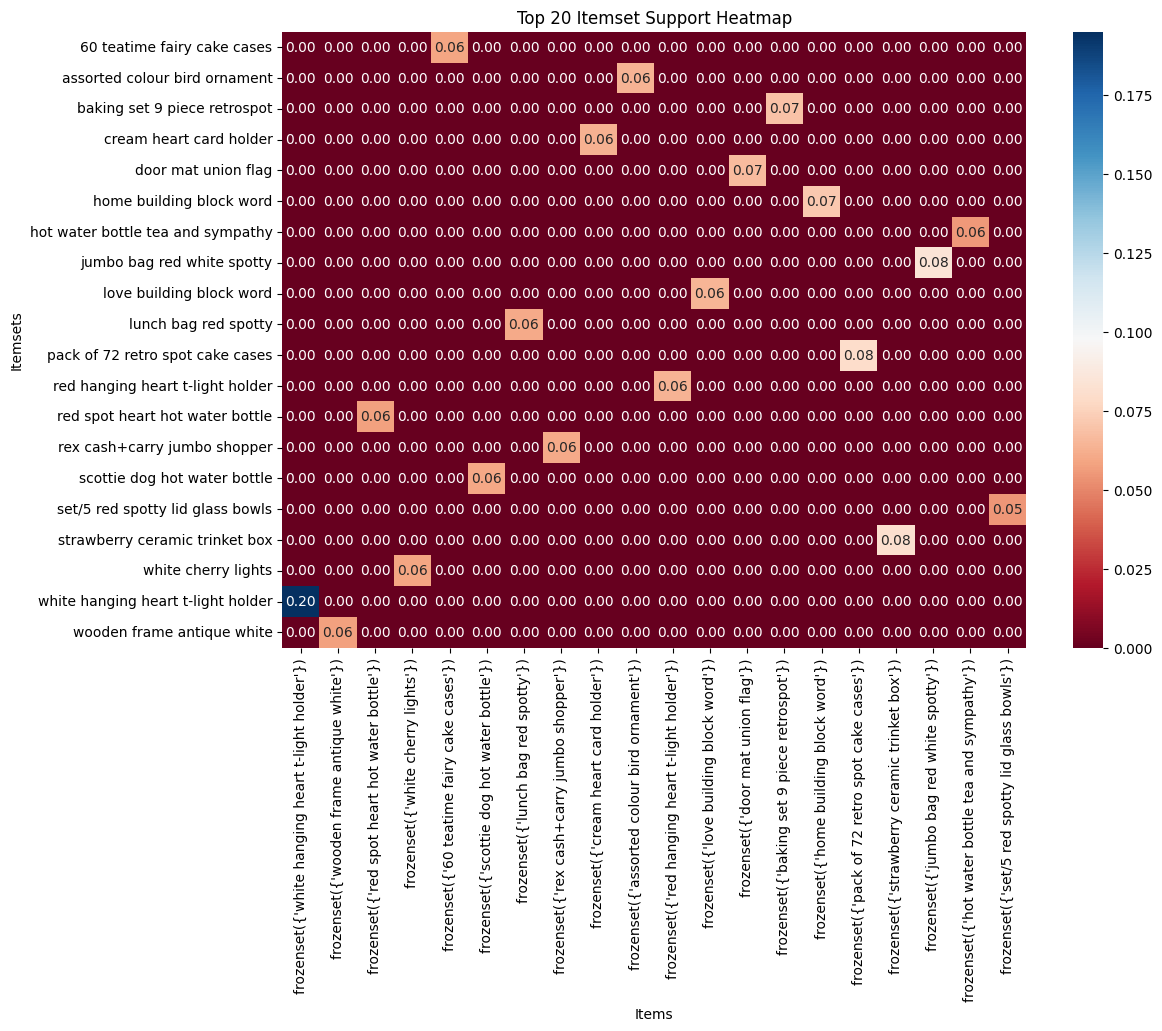

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'frequent_itemsets' DataFrame from Apriori

# 1. Filter for Top Itemsets (e.g., top 20)
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(20)

# 2. Create Pivot Table for Heatmap
heatmap_data = top_itemsets.pivot(index='itemsets_str', columns='itemsets', values='support')
heatmap_data = heatmap_data.fillna(0)  # Fill NaN with 0 if any

# 3. Create Heatmap with Improved Color Scale
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data,
            annot=True,  # Show support values
            cmap='RdBu',  # Diverging colormap for better contrast
            fmt=".2f")   # Format support values to 2 decimal places
plt.title('Top 20 Itemset Support Heatmap')
plt.xlabel('Items')
plt.ylabel('Itemsets')
plt.show()

## Heatmap with Clustering

/usr/local/lib/python3.11/dist-packages/geopandas/_compat.py:7: DeprecationWarning:

The 'shapely.geos' module is deprecated, and will be removed in a future version. All attributes of 'shapely.geos' are available directly from the top-level 'shapely' namespace (since shapely 2.0.0).



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.0/338.0 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


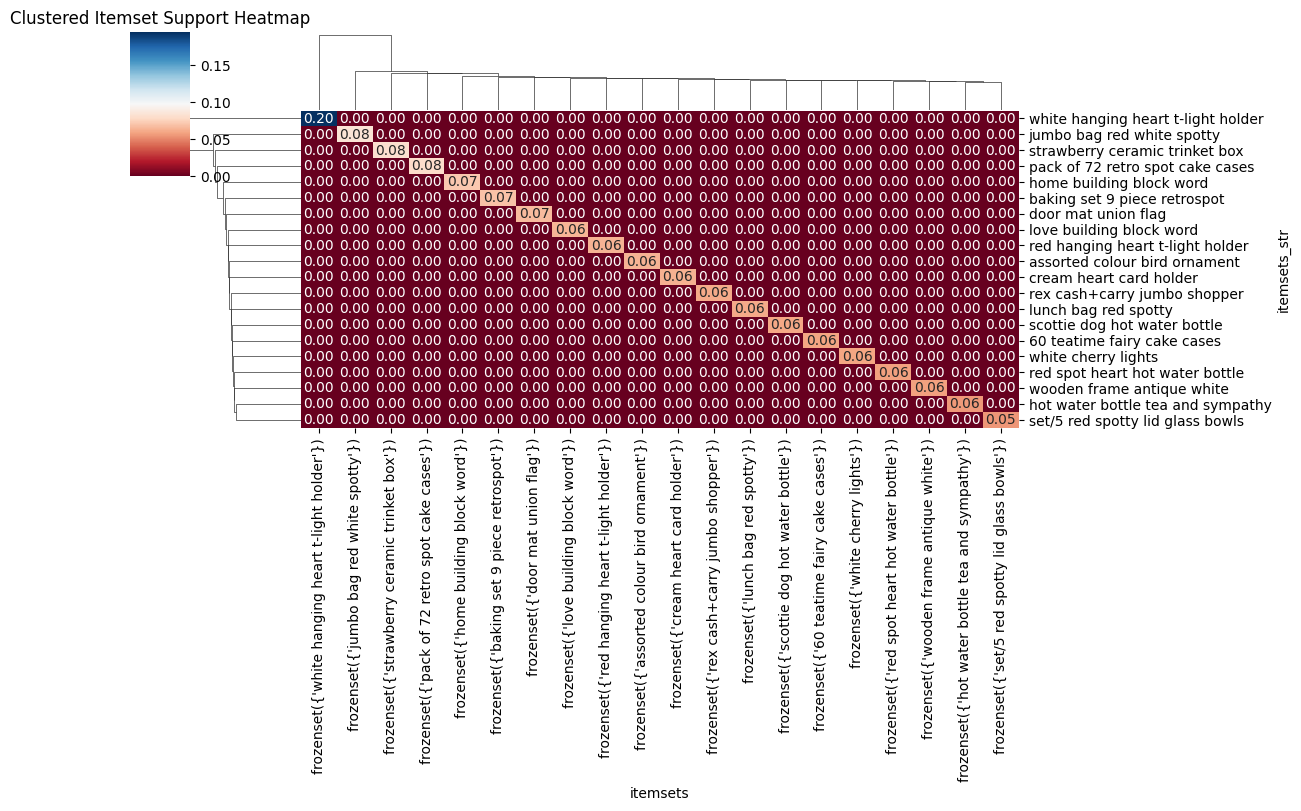

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore", message="The 'shapely.geos' module is deprecated")

!pip install --upgrade geopandas

# Assuming you have 'heatmap_data' from the previous code

# Create clustermap
sns.clustermap(heatmap_data,
               annot=True,
               cmap='RdBu',
               fmt=".2f",
               figsize=(12, 8))  # Adjust figsize as needed

plt.title('Clustered Itemset Support Heatmap')
plt.show()

# Convert frozenset columns to strings for plotting
heatmap_data.columns = heatmap_data.columns.map(lambda x: ', '.join(sorted(list(x))))
heatmap_data.index = heatmap_data.index.map(lambda x: ', '.join(sorted(list(x))))

# Create dendrogram
fig_dendro = ff.create_dendrogram(heatmap_data, orientation='bottom')
dendro_leaves = fig_dendro['layout']['xaxis']['ticktext']  # Get reordered labels

# Reorder heatmap data based on dendrogram
heatmap_data_reordered = heatmap_data.reindex(index=dendro_leaves, columns=dendro_leaves)

# Create heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=heatmap_data_reordered.values,
                   x=heatmap_data_reordered.columns,
                   y=heatmap_data_reordered.index,
                   colorscale='RdBu'))

fig_heatmap.update_layout(title='Clustered Itemset Support Heatmap (Plotly)',
                      xaxis_nticks=len(heatmap_data_reordered.columns),
                      yaxis_nticks=len(heatmap_data_reordered.index))

fig_heatmap.show()

## Interactive Heatmap

In [ ]:
import plotly.express as px

# Assuming you have 'heatmap_data' from the previous code

fig = px.imshow(heatmap_data,
                x=heatmap_data.columns,
                y=heatmap_data.index,
                color_continuous_scale='RdBu',
                text_auto=True)
# Convert frozenset columns to strings before plotting
heatmap_data.columns = heatmap_data.columns.map(lambda x: ', '.join(sorted(list(x))))
# Convert frozenset index to strings before plotting
heatmap_data.index = heatmap_data.index.map(lambda x: ', '.join(sorted(list(x))))

fig = px.imshow(heatmap_data,
                x=heatmap_data.columns,
                y=heatmap_data.index,
                color_continuous_scale='RdBu',
                text_auto=True)
fig.update_xaxes(side="top")
fig.update_layout(title_text='Interactive Itemset Support Heatmap')
fig.show()

# Plotly dashboard


In [ ]:
# Filter only UK transactions
df_uk = df[df['Country'] == 'United Kingdom']

# Remove rare products (appeared < 30 times)
product_counts = df_uk['Description'].value_counts()
popular_products = product_counts[product_counts >= 30].index
df_uk = df_uk[df_uk['Description'].isin(popular_products)]

# Create basket matrix for analysis
basket = (df_uk
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum()
          .unstack()
          .fillna(0)
          .applymap(lambda x: 1 if x > 0 else 0))


<ipython-input-36-581762503>:15: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --------------------- 1. Monthly Sales Trend ---------------------
monthly_sales = df_uk.copy()
monthly_sales['InvoiceDate'] = pd.to_datetime(monthly_sales['InvoiceDate'])
monthly_sales['Month'] = monthly_sales['InvoiceDate'].dt.to_period('M')
monthly_summary = monthly_sales.groupby('Month')['Quantity'].sum().reset_index()
monthly_summary['Month'] = monthly_summary['Month'].astype(str)

# --------------------- 2. Top 10 Products ---------------------
top_products = df_uk['Description'].value_counts().head(10)
products_bar = go.Bar(x=top_products.index, y=top_products.values, name="Top Products")

# --------------------- 3. Top 10 Customers ---------------------
top_customers = df_uk['Customer ID'].value_counts().head(10)
customers_bar = go.Bar(x=top_customers.index.astype(str), y=top_customers.values, name="Top Customers")

# --------------------- 4. Sankey from Association Rules ---------------------
# (Assuming you've already generated `rules_pretty` as in Phase 5)
from mlxtend.frequent_patterns import association_rules

# Generate association rules from frequent itemsets (using basket)
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Convert antecedents and consequents to strings for readability
rules['Antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules['Consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x))).astype("unicode")

# Now 'rules' DataFrame serves as a stand-in for 'rules_pretty'
rules_pretty = rules

def build_sankey_from_rules(rules_pretty, top_n=10):
    top_rules = rules_pretty.sort_values(by='lift', ascending=False).head(top_n)
    labels = list(set(top_rules['Antecedents'].tolist() + top_rules['Consequents'].tolist()))
    label_to_idx = {label: i for i, label in enumerate(labels)}

    source = [label_to_idx[a] for a in top_rules['Antecedents']]
    target = [label_to_idx[c] for c in top_rules['Consequents']]
    value = top_rules['lift'].round(2)

    sankey = go.Sankey(
        node=dict(label=labels, pad=15, thickness=20),
        link=dict(source=source, target=target, value=value)
    )
    return sankey

sankey_diagram = build_sankey_from_rules(rules_pretty)

# --------------------- 5. Heatmap of Product Co-occurrence ---------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

top_items = df_uk['Description'].value_counts().head(10).index
basket_top = basket[top_items]
correlation_matrix = basket_top.corr()

heatmap_fig = px.imshow(correlation_matrix,
                        text_auto=".2f",
                        color_continuous_scale='RdBu',
                        title="Co-occurrence Heatmap of Top Products")

# --------------------- Combine all in Plotly Dashboard ---------------------
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Monthly Sales Trend", "Top 10 Products", "Top 10 Customers", "Association Rules Sankey", "Heatmap"),
                    specs=[[{"type": "xy"}, {"type": "xy"}],
                           [{"type": "xy"}, {"type": "domain"}],
                           [{"colspan": 2, "type": "xy"}, None]],
                    vertical_spacing=0.15)

# Add traces
fig.add_trace(go.Scatter(x=monthly_summary['Month'], y=monthly_summary['Quantity'], mode='lines+markers', name="Monthly Sales"), row=1, col=1)
fig.add_trace(products_bar, row=1, col=2)
fig.add_trace(customers_bar, row=2, col=1)
fig.add_trace(sankey_diagram, row=2, col=2)

# Add empty placeholder for heatmap (external figure shown separately)
fig.update_layout(height=900, width=1000, showlegend=False, title_text="Market Basket Analysis Dashboard")
fig.show()

# Show heatmap separately (due to Plotly Sankey not combining well)
heatmap_fig.show()


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [ ]:
# Export frequent itemsets
frequent_itemsets.to_csv('frequent_itemsets.csv', index=False)

# Export association rules
rules_pretty.to_csv('association_rules.csv', index=False)

# Optional: monthly sales trend
monthly_sales.to_csv('monthly_sales.csv', index=False)

# Optional: top products and customers
top_products.to_csv('top_products.csv', index=False)
top_customers.to_csv('top_customers.csv', index=False)


In [ ]:
from google.colab import files
files.download('frequent_itemsets.csv')
files.download('association_rules.csv')
files.download('monthly_sales.csv')
files.download('top_products.csv')
files.download('top_customers.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>